In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from statistics import mean, stdev

In [2]:
sns.set_style('darkgrid')
cmap=sns.light_palette("seagreen",as_cmap=True)
pd.set_option('display.float_format','{:.4f}'.format)

In [3]:
unfair = pd.read_csv('adult-race-result/unfair_lr-100.csv', index_col=0)
zhang = pd.read_csv('adult-race-result/zhang-100.csv', index_col=0)
laftr = pd.read_csv('adult-race-result/laftr-100.csv', index_col=0)

In [4]:
unfair

,model_name,cv_seed,clas_acc,dp,deqodds,deqopp,trade_dp,trade_deqodds,trade_deqopp
0,UnfairLR-decay,13,0.8372,0.2074,0.7728,0.6034,0.3325,0.8037,0.7013
1,UnfairLR-decay,29,0.8366,0.3062,0.8008,0.6695,0.4483,0.8183,0.7437
2,UnfairLR-decay,42,0.8355,0.2422,0.7271,0.5249,0.3755,0.7776,0.6448
3,UnfairLR-decay,55,0.8343,0.2356,0.7314,0.5282,0.3675,0.7795,0.6469
4,UnfairLR-decay,73,0.8336,0.2242,0.7545,0.5672,0.3533,0.7921,0.6751
5,UnfairLR,13,0.8492,0.1589,0.7848,0.6207,0.2678,0.8157,0.7172
6,UnfairLR,29,0.8492,0.1732,0.7974,0.6525,0.2877,0.8225,0.7380
7,UnfairLR,42,0.8544,0.1776,0.7439,0.5602,0.2941,0.7954,0.6767
8,UnfairLR,55,0.8505,0.1516,0.7184,0.4936,0.2574,0.7789,0.6246
9,UnfairLR,73,0.8478,0.1527,0.7506,0.5560,0.2588,0.7963,0.6715


In [5]:
zhang

,model_name,cv_seed,clas_acc,dp,deqodds,deqopp,trade_dp,trade_deqodds,trade_deqopp
0,Zhang4DP,13,0.8501,0.1673,0.7922,0.6434,0.2795,0.8201,0.7325
1,Zhang4DP,29,0.8484,0.1782,0.7948,0.6547,0.2946,0.8207,0.7391
2,Zhang4DP,42,0.8529,0.1811,0.7539,0.5806,0.2988,0.8003,0.6909
3,Zhang4DP,55,0.8512,0.1513,0.7144,0.4876,0.2569,0.7768,0.6200
4,Zhang4DP,73,0.8468,0.1601,0.7544,0.5700,0.2693,0.7979,0.6814
5,Zhang4EqOdds,13,0.8494,0.1594,0.7818,0.6170,0.2685,0.8142,0.7148
6,Zhang4EqOdds,29,0.8492,0.1719,0.7816,0.6245,0.2860,0.8140,0.7197
7,Zhang4EqOdds,42,0.8530,0.1741,0.7515,0.5701,0.2891,0.7990,0.6834
8,Zhang4EqOdds,55,0.8512,0.1444,0.7110,0.4746,0.2469,0.7748,0.6094
9,Zhang4EqOdds,73,0.8477,0.1502,0.7354,0.5272,0.2552,0.7876,0.6501


In [6]:
laftr

,model_name,cv_seed,fair_coeff,clas_acc,dp,deqodds,deqopp,trade_dp,trade_deqodds,trade_deqopp
0,LAFTR4DP,13,0.2000,0.8487,0.1699,0.7962,0.6513,0.2831,0.8216,0.7370
1,LAFTR4DP,13,0.5000,0.8501,0.1710,0.8082,0.6762,0.2847,0.8286,0.7532
2,LAFTR4DP,13,0.7000,0.8493,0.1956,0.8267,0.7314,0.3180,0.8379,0.7859
3,LAFTR4DP,13,1.0000,0.8484,0.2017,0.8297,0.7426,0.3259,0.8389,0.7920
4,LAFTR4DP,29,0.2000,0.8492,0.1833,0.8030,0.6733,0.3016,0.8255,0.7511
5,LAFTR4DP,29,0.5000,0.8509,0.1715,0.8013,0.6601,0.2854,0.8253,0.7435
6,LAFTR4DP,29,0.7000,0.8501,0.1869,0.8196,0.7077,0.3064,0.8346,0.7724
7,LAFTR4DP,29,1.0000,0.8486,0.1886,0.8091,0.6907,0.3087,0.8284,0.7616
8,LAFTR4DP,42,0.2000,0.8520,0.2110,0.8153,0.7135,0.3383,0.8332,0.7766
9,LAFTR4DP,42,0.5000,0.8495,0.2238,0.8153,0.7272,0.3542,0.8320,0.7836


## Acc mean and std

In [7]:
unfair_acc = unfair.groupby(['model_name'])['clas_acc'].agg([mean, stdev])
zhang_acc = zhang.groupby(['model_name'])['clas_acc'].agg([mean, stdev])
laftr_acc = laftr.groupby(['model_name', 'fair_coeff'])['clas_acc'].agg([mean, stdev])

In [8]:
acc = pd.concat([unfair_acc, zhang_acc, laftr_acc])
acc = acc.reset_index()
acc = acc.rename(columns={'index': 'model_name'})
acc

,model_name,mean,stdev
0,UnfairLR,0.8502,0.0025
1,UnfairLR-decay,0.8355,0.0015
2,Zhang4DP,0.8499,0.0024
3,Zhang4EqOdds,0.8501,0.0021
4,Zhang4EqOpp,0.8500,0.0021
5,"(LAFTR4DP, 0.2)",0.8501,0.0020
6,"(LAFTR4DP, 0.5)",0.8499,0.0018
7,"(LAFTR4DP, 0.7)",0.8497,0.0015
8,"(LAFTR4DP, 1.0)",0.8496,0.0019
9,"(LAFTR4EqOdds, 0.2)",0.8494,0.0016


In [9]:
names = acc['model_name'].to_list()
for i in range(len(names)):
    if isinstance(names[i], tuple):
        names[i] = '-'.join([str(value) for value in names[i]])

names

['UnfairLR',
 'UnfairLR-decay',
 'Zhang4DP',
 'Zhang4EqOdds',
 'Zhang4EqOpp',
 'LAFTR4DP-0.2',
 'LAFTR4DP-0.5',
 'LAFTR4DP-0.7',
 'LAFTR4DP-1.0',
 'LAFTR4EqOdds-0.2',
 'LAFTR4EqOdds-0.5',
 'LAFTR4EqOdds-0.7',
 'LAFTR4EqOdds-1.0',
 'LAFTR4EqOpp-0.2',
 'LAFTR4EqOpp-0.5',
 'LAFTR4EqOpp-0.7',
 'LAFTR4EqOpp-1.0']

In [10]:
acc['model_name'] = names
acc

,model_name,mean,stdev
0,UnfairLR,0.8502,0.0025
1,UnfairLR-decay,0.8355,0.0015
2,Zhang4DP,0.8499,0.0024
3,Zhang4EqOdds,0.8501,0.0021
4,Zhang4EqOpp,0.8500,0.0021
5,LAFTR4DP-0.2,0.8501,0.0020
6,LAFTR4DP-0.5,0.8499,0.0018
7,LAFTR4DP-0.7,0.8497,0.0015
8,LAFTR4DP-1.0,0.8496,0.0019
9,LAFTR4EqOdds-0.2,0.8494,0.0016


In [11]:
print((acc['mean'].round(4).astype(str) + ' $\pm$ ' + acc['stdev'].round(4).astype(str)).to_string(index=False))

 0.8502 $\pm$ 0.0025
 0.8355 $\pm$ 0.0015
 0.8499 $\pm$ 0.0024
 0.8501 $\pm$ 0.0021
   0.85 $\pm$ 0.0021
  0.8501 $\pm$ 0.002
 0.8499 $\pm$ 0.0018
 0.8497 $\pm$ 0.0015
 0.8496 $\pm$ 0.0019
 0.8494 $\pm$ 0.0016
 0.8494 $\pm$ 0.0016
 0.8494 $\pm$ 0.0016
 0.8494 $\pm$ 0.0016
  0.8488 $\pm$ 0.002
  0.8488 $\pm$ 0.002
  0.8488 $\pm$ 0.002
  0.8488 $\pm$ 0.002


## Fairness mean and std

In [12]:
unfair_dp = unfair.groupby(['model_name'])['dp'].agg([mean, stdev])
zhang_dp = zhang.groupby(['model_name'])['dp'].agg([mean, stdev])
laftr_dp = laftr.groupby(['model_name', 'fair_coeff'])['dp'].agg([mean, stdev])

In [13]:
dp = pd.concat([unfair_dp, zhang_dp, laftr_dp])
dp = dp.reset_index()
dp = dp.rename(columns={'index': 'model_name'})
dp['model_name'] = names
dp

,model_name,mean,stdev
0,UnfairLR,0.1628,0.0119
1,UnfairLR-decay,0.2431,0.0377
2,Zhang4DP,0.1676,0.0124
3,Zhang4EqOdds,0.1600,0.0130
4,Zhang4EqOpp,0.1645,0.0137
5,LAFTR4DP-0.2,0.1800,0.0188
6,LAFTR4DP-0.5,0.1823,0.0232
7,LAFTR4DP-0.7,0.1919,0.0121
8,LAFTR4DP-1.0,0.1977,0.0187
9,LAFTR4EqOdds-0.2,0.1816,0.0189


In [14]:
print((dp['mean'].round(4).astype(str) + ' $\pm$ ' + dp['stdev'].round(4).astype(str)).to_string(index=False))

 0.1628 $\pm$ 0.0119
 0.2431 $\pm$ 0.0377
 0.1676 $\pm$ 0.0124
    0.16 $\pm$ 0.013
 0.1645 $\pm$ 0.0137
   0.18 $\pm$ 0.0188
 0.1823 $\pm$ 0.0232
 0.1919 $\pm$ 0.0121
 0.1977 $\pm$ 0.0187
 0.1816 $\pm$ 0.0189
 0.1816 $\pm$ 0.0189
 0.1816 $\pm$ 0.0189
 0.1816 $\pm$ 0.0189
  0.2063 $\pm$ 0.018
  0.2063 $\pm$ 0.018
  0.2063 $\pm$ 0.018
  0.2063 $\pm$ 0.018


In [15]:
unfair_deqodds = unfair.groupby(['model_name'])['deqodds'].agg([mean, stdev])
zhang_deqodds = zhang.groupby(['model_name'])['deqodds'].agg([mean, stdev])
laftr_deqodds = laftr.groupby(['model_name', 'fair_coeff'])['deqodds'].agg([mean, stdev])

In [16]:
deqodds = pd.concat([unfair_deqodds, zhang_deqodds, laftr_deqodds])
deqodds = deqodds.reset_index()
deqodds = deqodds.rename(columns={'index': 'model_name'})
deqodds['model_name'] = names
deqodds

,model_name,mean,stdev
0,UnfairLR,0.7590,0.0320
1,UnfairLR-decay,0.7573,0.0305
2,Zhang4DP,0.7619,0.0331
3,Zhang4EqOdds,0.7523,0.0305
4,Zhang4EqOpp,0.7573,0.0294
5,LAFTR4DP-0.2,0.7900,0.0253
6,LAFTR4DP-0.5,0.7996,0.0129
7,LAFTR4DP-0.7,0.8110,0.0177
8,LAFTR4DP-1.0,0.8122,0.0171
9,LAFTR4EqOdds-0.2,0.7932,0.0235


In [17]:
print((deqodds['mean'].round(4).astype(str) + ' $\pm$ ' + deqodds['stdev'].round(4).astype(str)).to_string(index=False))

   0.759 $\pm$ 0.032
 0.7573 $\pm$ 0.0305
 0.7619 $\pm$ 0.0331
 0.7523 $\pm$ 0.0305
 0.7573 $\pm$ 0.0294
   0.79 $\pm$ 0.0253
 0.7996 $\pm$ 0.0129
  0.811 $\pm$ 0.0177
 0.8122 $\pm$ 0.0171
 0.7932 $\pm$ 0.0235
 0.7932 $\pm$ 0.0235
 0.7932 $\pm$ 0.0235
 0.7932 $\pm$ 0.0235
  0.823 $\pm$ 0.0182
  0.823 $\pm$ 0.0182
  0.823 $\pm$ 0.0182
  0.823 $\pm$ 0.0182


In [18]:
unfair_deqopp = unfair.groupby(['model_name'])['deqopp'].agg([mean, stdev])
zhang_deqopp = zhang.groupby(['model_name'])['deqopp'].agg([mean, stdev])
laftr_deqopp = laftr.groupby(['model_name', 'fair_coeff'])['deqopp'].agg([mean, stdev])

In [19]:
deqopp = pd.concat([unfair_deqopp, zhang_deqopp, laftr_deqopp])
deqopp = deqopp.reset_index()
deqopp = deqopp.rename(columns={'index': 'model_name'})
deqopp['model_name'] = names
deqopp

,model_name,mean,stdev
0,UnfairLR,0.5766,0.0618
1,UnfairLR-decay,0.5786,0.0600
2,Zhang4DP,0.5873,0.0670
3,Zhang4EqOdds,0.5627,0.0629
4,Zhang4EqOpp,0.5754,0.0596
5,LAFTR4DP-0.2,0.6466,0.0577
6,LAFTR4DP-0.5,0.6669,0.0380
7,LAFTR4DP-0.7,0.6964,0.0391
8,LAFTR4DP-1.0,0.7039,0.0438
9,LAFTR4EqOdds-0.2,0.6559,0.0531


In [20]:
print((deqopp['mean'].round(4).astype(str) + ' $\pm$ ' + deqopp['stdev'].round(4).astype(str)).to_string(index=False))

 0.5766 $\pm$ 0.0618
   0.5786 $\pm$ 0.06
  0.5873 $\pm$ 0.067
 0.5627 $\pm$ 0.0629
 0.5754 $\pm$ 0.0596
 0.6466 $\pm$ 0.0577
  0.6669 $\pm$ 0.038
 0.6964 $\pm$ 0.0391
 0.7039 $\pm$ 0.0438
 0.6559 $\pm$ 0.0531
 0.6559 $\pm$ 0.0531
 0.6559 $\pm$ 0.0531
 0.6559 $\pm$ 0.0531
 0.7311 $\pm$ 0.0413
 0.7311 $\pm$ 0.0413
 0.7311 $\pm$ 0.0413
 0.7311 $\pm$ 0.0413


## Trade-offs mean and std

In [21]:
unfair_trade_dp = unfair.groupby(['model_name'])['trade_dp'].agg([mean, stdev])
zhang_trade_dp = zhang.groupby(['model_name'])['trade_dp'].agg([mean, stdev])
laftr_trade_dp = laftr.groupby(['model_name', 'fair_coeff'])['trade_dp'].agg([mean, stdev])

In [22]:
trade_dp = pd.concat([unfair_trade_dp, zhang_trade_dp, laftr_trade_dp])
trade_dp = trade_dp.reset_index()
trade_dp = trade_dp.rename(columns={'index': 'model_name'})
trade_dp['model_name'] = names
trade_dp

,model_name,mean,stdev
0,UnfairLR,0.2731,0.0168
1,UnfairLR-decay,0.3754,0.0439
2,Zhang4DP,0.2798,0.0174
3,Zhang4EqOdds,0.2691,0.0185
4,Zhang4EqOpp,0.2754,0.0192
5,LAFTR4DP-0.2,0.2967,0.0253
6,LAFTR4DP-0.5,0.2996,0.0306
7,LAFTR4DP-0.7,0.3129,0.0160
8,LAFTR4DP-1.0,0.3205,0.0243
9,LAFTR4EqOdds-0.2,0.2988,0.0253


In [23]:
print((trade_dp['mean'].round(4).astype(str) + ' $\pm$ ' + trade_dp['stdev'].round(4).astype(str)).to_string(index=False))

 0.2731 $\pm$ 0.0168
 0.3754 $\pm$ 0.0439
 0.2798 $\pm$ 0.0174
 0.2691 $\pm$ 0.0185
 0.2754 $\pm$ 0.0192
 0.2967 $\pm$ 0.0253
 0.2996 $\pm$ 0.0306
  0.3129 $\pm$ 0.016
 0.3205 $\pm$ 0.0243
 0.2988 $\pm$ 0.0253
 0.2988 $\pm$ 0.0253
 0.2988 $\pm$ 0.0253
 0.2988 $\pm$ 0.0253
 0.3316 $\pm$ 0.0231
 0.3316 $\pm$ 0.0231
 0.3316 $\pm$ 0.0231
 0.3316 $\pm$ 0.0231


In [24]:
unfair_trade_deqodds = unfair.groupby(['model_name'])['trade_deqodds'].agg([mean, stdev])
zhang_trade_deqodds = zhang.groupby(['model_name'])['trade_deqodds'].agg([mean, stdev])
laftr_trade_deqodds = laftr.groupby(['model_name', 'fair_coeff'])['trade_deqodds'].agg([mean, stdev])

In [25]:
trade_deqodds = pd.concat([unfair_trade_deqodds, zhang_trade_deqodds, laftr_trade_deqodds])
trade_deqodds = trade_deqodds.reset_index()
trade_deqodds = trade_deqodds.rename(columns={'index': 'model_name'})
trade_deqodds['model_name'] = names
trade_deqodds

,model_name,mean,stdev
0,UnfairLR,0.8017,0.0175
1,UnfairLR-decay,0.7942,0.0171
2,Zhang4DP,0.8032,0.0182
3,Zhang4EqOdds,0.7979,0.0171
4,Zhang4EqOpp,0.8008,0.0165
5,LAFTR4DP-0.2,0.8187,0.0135
6,LAFTR4DP-0.5,0.8239,0.0069
7,LAFTR4DP-0.7,0.8298,0.0088
8,LAFTR4DP-1.0,0.8304,0.0091
9,LAFTR4EqOdds-0.2,0.8202,0.0125


In [26]:
print((trade_deqodds['mean'].round(4).astype(str) + ' $\pm$ ' + trade_deqodds['stdev'].round(4).astype(str)).to_string(index=False))

 0.8017 $\pm$ 0.0175
 0.7942 $\pm$ 0.0171
 0.8032 $\pm$ 0.0182
 0.7979 $\pm$ 0.0171
 0.8008 $\pm$ 0.0165
 0.8187 $\pm$ 0.0135
 0.8239 $\pm$ 0.0069
 0.8298 $\pm$ 0.0088
 0.8304 $\pm$ 0.0091
 0.8202 $\pm$ 0.0125
 0.8202 $\pm$ 0.0125
 0.8202 $\pm$ 0.0125
 0.8202 $\pm$ 0.0125
 0.8356 $\pm$ 0.0091
 0.8356 $\pm$ 0.0091
 0.8356 $\pm$ 0.0091
 0.8356 $\pm$ 0.0091


In [27]:
unfair_trade_deqopp = unfair.groupby(['model_name'])['trade_deqopp'].agg([mean, stdev])
zhang_trade_deqopp = zhang.groupby(['model_name'])['trade_deqopp'].agg([mean, stdev])
laftr_trade_deqopp = laftr.groupby(['model_name', 'fair_coeff'])['trade_deqopp'].agg([mean, stdev])

In [28]:
trade_deqopp = pd.concat([unfair_trade_deqopp, zhang_trade_deqopp, laftr_trade_deqopp])
trade_deqopp = trade_deqopp.reset_index()
trade_deqopp = trade_deqopp.rename(columns={'index': 'model_name'})
trade_deqopp['model_name'] = names
trade_deqopp

,model_name,mean,stdev
0,UnfairLR,0.6856,0.0440
1,UnfairLR-decay,0.6824,0.0414
2,Zhang4DP,0.6928,0.0478
3,Zhang4EqOdds,0.6755,0.0463
4,Zhang4EqOpp,0.6848,0.0437
5,LAFTR4DP-0.2,0.7333,0.0380
6,LAFTR4DP-0.5,0.7469,0.0234
7,LAFTR4DP-0.7,0.7649,0.0238
8,LAFTR4DP-1.0,0.7694,0.0263
9,LAFTR4EqOdds-0.2,0.7392,0.0350


In [29]:
print((trade_deqopp['mean'].round(4).astype(str) + ' $\pm$ ' + trade_deqopp['stdev'].round(4).astype(str)).to_string(index=False))

  0.6856 $\pm$ 0.044
 0.6824 $\pm$ 0.0414
 0.6928 $\pm$ 0.0478
 0.6755 $\pm$ 0.0463
 0.6848 $\pm$ 0.0437
  0.7333 $\pm$ 0.038
 0.7469 $\pm$ 0.0234
 0.7649 $\pm$ 0.0238
 0.7694 $\pm$ 0.0263
  0.7392 $\pm$ 0.035
  0.7392 $\pm$ 0.035
  0.7392 $\pm$ 0.035
  0.7392 $\pm$ 0.035
  0.785 $\pm$ 0.0243
  0.785 $\pm$ 0.0243
  0.785 $\pm$ 0.0243
  0.785 $\pm$ 0.0243


## t-test

In [30]:
unfair_lr, unfair_lr_decay = [x for _, x in unfair.groupby(['model_name'])]
zhang4dp, zhang4deqodds, zhang4deqopp = [x for _, x in zhang.groupby(['model_name'])]
(
    laftr4dp_02, laftr4dp_05, laftr4dp_07, laftr4dp_1, 
    laftr4deqodds_02, laftr4deqodds_05, laftr4deqodds_07, laftr4deqodds_1, 
    laftr4deqopp_02, laftr4deqopp_05, laftr4deqopp_07, laftr4deqopp_1
) = [x for _, x in laftr.groupby(['model_name', 'fair_coeff'])]

In [31]:
models = [
    unfair_lr, unfair_lr_decay,
    zhang4dp, zhang4deqodds, zhang4deqopp,
    laftr4dp_02, laftr4dp_05, laftr4dp_07, laftr4dp_1, 
    laftr4deqodds_02, laftr4deqodds_05, laftr4deqodds_07, laftr4deqodds_1, 
    laftr4deqopp_02, laftr4deqopp_05, laftr4deqopp_07, laftr4deqopp_1
]

In [32]:
alpha = 0.05 # significance level
confidence = 1 - alpha # confidence level
l = len(models)

In [33]:
base_df = pd.DataFrame(index=names, columns=names, dtype=object)

### for accuracies

In [34]:
res_acc = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['clas_acc'], models[j]['clas_acc'])
        res_acc.iloc[i, j] = stat[1]

In [35]:
res_acc.values[[np.arange(res_acc.shape[0])]*2] = '-'
res_acc.T.fillna('')

<ipython-input-35-f271aa6f61ae>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_acc.values[[np.arange(res_acc.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0
UnfairLR,-,,,,,,,,,,,,,,,,
UnfairLR-decay,0.0003,-,,,,,,,,,,,,,,,
Zhang4DP,0.5122,0.0002,-,,,,,,,,,,,,,,
Zhang4EqOdds,0.7262,0.0002,0.4845,-,,,,,,,,,,,,,
Zhang4EqOpp,0.3291,0.0002,0.8188,0.8024,-,,,,,,,,,,,,
LAFTR4DP-0.2,0.8449,0.0003,0.7325,0.9722,0.9159,-,,,,,,,,,,,
LAFTR4DP-0.5,0.8198,0.0001,0.9530,0.8653,0.9500,0.8542,-,,,,,,,,,,
LAFTR4DP-0.7,0.6359,0.0001,0.8469,0.6074,0.7575,0.5169,0.4538,-,,,,,,,,,
LAFTR4DP-1.0,0.2257,0.0002,0.5796,0.0526,0.3388,0.1962,0.7360,0.8827,-,,,,,,,,
LAFTR4EqOdds-0.2,0.2491,0.0001,0.3674,0.0862,0.3004,0.1032,0.4179,0.4476,0.5129,-,,,,,,,


### for fairness

In [36]:
res_dp = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['dp'], models[j]['dp'])
        res_dp.iloc[i, j] = stat[1]

In [37]:
res_dp.values[[np.arange(res_dp.shape[0])]*2] = '-'
res_dp.T.fillna('')

<ipython-input-37-5ab64d67172f>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_dp.values[[np.arange(res_dp.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0
UnfairLR,-,,,,,,,,,,,,,,,,
UnfairLR-decay,0.0050,-,,,,,,,,,,,,,,,
Zhang4DP,0.0355,0.0071,-,,,,,,,,,,,,,,
Zhang4EqOdds,0.0990,0.0046,0.0003,-,,,,,,,,,,,,,
Zhang4EqOpp,0.1396,0.0056,0.0908,0.0135,-,,,,,,,,,,,,
LAFTR4DP-0.2,0.0179,0.0188,0.0606,0.0141,0.0175,-,,,,,,,,,,,
LAFTR4DP-0.5,0.0673,0.0379,0.1560,0.0575,0.0785,0.6213,-,,,,,,,,,,
LAFTR4DP-0.7,0.0024,0.0503,0.0035,0.0017,0.0030,0.0648,0.2137,-,,,,,,,,,
LAFTR4DP-1.0,0.0043,0.0840,0.0082,0.0037,0.0043,0.0169,0.0222,0.1862,-,,,,,,,,
LAFTR4EqOdds-0.2,0.0276,0.0312,0.0616,0.0186,0.0289,0.5778,0.8779,0.0412,0.0055,-,,,,,,,


In [38]:
res_deqodds = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['deqodds'], models[j]['deqodds'])
        res_deqodds.iloc[i, j] = stat[1]

In [39]:
res_deqodds.values[[np.arange(res_deqodds.shape[0])]*2] = '-'
res_deqodds.T.fillna('')

<ipython-input-39-950da47788eb>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_deqodds.values[[np.arange(res_deqodds.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0
UnfairLR,-,,,,,,,,,,,,,,,,
UnfairLR-decay,0.7754,-,,,,,,,,,,,,,,,
Zhang4DP,0.3416,0.5996,-,,,,,,,,,,,,,,
Zhang4EqOdds,0.1924,0.6105,0.0355,-,,,,,,,,,,,,,
Zhang4EqOpp,0.7126,0.9995,0.1353,0.1231,-,,,,,,,,,,,,
LAFTR4DP-0.2,0.0557,0.0910,0.0537,0.0146,0.0146,-,,,,,,,,,,,
LAFTR4DP-0.5,0.0349,0.0427,0.0406,0.0112,0.0160,0.2600,-,,,,,,,,,,
LAFTR4DP-0.7,0.0041,0.0056,0.0047,0.0026,0.0018,0.0689,0.2293,-,,,,,,,,,
LAFTR4DP-1.0,0.0135,0.0214,0.0129,0.0037,0.0047,0.0283,0.0131,0.8749,-,,,,,,,,
LAFTR4EqOdds-0.2,0.0182,0.0424,0.0134,0.0040,0.0024,0.5687,0.4485,0.0203,0.0328,-,,,,,,,


In [40]:
res_deqopp = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['deqopp'], models[j]['deqopp'])
        res_deqopp.iloc[i, j] = stat[1]

In [41]:
res_deqopp.values[[np.arange(res_deqopp.shape[0])]*2] = '-'
res_deqopp.T.fillna('')

<ipython-input-41-970c353c1324>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_deqopp.values[[np.arange(res_deqopp.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0
UnfairLR,-,,,,,,,,,,,,,,,,
UnfairLR-decay,0.8785,-,,,,,,,,,,,,,,,
Zhang4DP,0.1231,0.6501,-,,,,,,,,,,,,,,
Zhang4EqOdds,0.1351,0.4546,0.0141,-,,,,,,,,,,,,,
Zhang4EqOpp,0.8789,0.8733,0.0946,0.0505,-,,,,,,,,,,,,
LAFTR4DP-0.2,0.0410,0.1017,0.0559,0.0136,0.0138,-,,,,,,,,,,,
LAFTR4DP-0.5,0.0336,0.0605,0.0493,0.0137,0.0175,0.2403,-,,,,,,,,,,
LAFTR4DP-0.7,0.0026,0.0068,0.0034,0.0018,0.0013,0.0573,0.2092,-,,,,,,,,,
LAFTR4DP-1.0,0.0081,0.0199,0.0095,0.0028,0.0032,0.0196,0.0094,0.6747,-,,,,,,,,
LAFTR4EqOdds-0.2,0.0163,0.0564,0.0169,0.0047,0.0036,0.4337,0.5438,0.0212,0.0176,-,,,,,,,


### for trade-offs

In [42]:
res_trade_dp = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['trade_dp'], models[j]['trade_dp'])
        res_trade_dp.iloc[i, j] = stat[1]

In [43]:
res_trade_dp.values[[np.arange(res_trade_dp.shape[0])]*2] = '-'
res_trade_dp.T.fillna('')

<ipython-input-43-09fe37c19859>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_trade_dp.values[[np.arange(res_trade_dp.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0
UnfairLR,-,,,,,,,,,,,,,,,,
UnfairLR-decay,0.0034,-,,,,,,,,,,,,,,,
Zhang4DP,0.0375,0.0051,-,,,,,,,,,,,,,,
Zhang4EqOdds,0.1020,0.0031,0.0003,-,,,,,,,,,,,,,
Zhang4EqOpp,0.1419,0.0039,0.0918,0.0129,-,,,,,,,,,,,,
LAFTR4DP-0.2,0.0147,0.0155,0.0546,0.0119,0.0147,-,,,,,,,,,,,
LAFTR4DP-0.5,0.0596,0.0339,0.1475,0.0515,0.0712,0.6357,-,,,,,,,,,,
LAFTR4DP-0.7,0.0023,0.0463,0.0034,0.0018,0.0031,0.0648,0.1969,-,,,,,,,,,
LAFTR4DP-1.0,0.0036,0.0811,0.0071,0.0032,0.0037,0.0175,0.0220,0.1850,-,,,,,,,,
LAFTR4EqOdds-0.2,0.0246,0.0278,0.0561,0.0163,0.0261,0.5879,0.8974,0.0405,0.0059,-,,,,,,,


In [44]:
res_trade_deqodds = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['trade_deqodds'], models[j]['trade_deqodds'])
        res_trade_deqodds.iloc[i, j] = stat[1]

In [45]:
res_trade_deqodds.values[[np.arange(res_trade_deqodds.shape[0])]*2] = '-'
res_trade_deqodds.T.fillna('')

<ipython-input-45-89f6041a34a1>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_trade_deqodds.values[[np.arange(res_trade_deqodds.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0
UnfairLR,-,,,,,,,,,,,,,,,,
UnfairLR-decay,0.0835,-,,,,,,,,,,,,,,,
Zhang4DP,0.3811,0.1265,-,,,,,,,,,,,,,,
Zhang4EqOdds,0.1750,0.5260,0.0340,-,,,,,,,,,,,,,
Zhang4EqOpp,0.6903,0.2852,0.1554,0.1456,-,,,,,,,,,,,,
LAFTR4DP-0.2,0.0515,0.0412,0.0523,0.0145,0.0140,-,,,,,,,,,,,
LAFTR4DP-0.5,0.0324,0.0200,0.0390,0.0113,0.0171,0.2708,-,,,,,,,,,,
LAFTR4DP-0.7,0.0045,0.0029,0.0056,0.0032,0.0025,0.0775,0.2364,-,,,,,,,,,
LAFTR4DP-1.0,0.0146,0.0129,0.0145,0.0046,0.0059,0.0303,0.0174,0.8866,-,,,,,,,,
LAFTR4EqOdds-0.2,0.0173,0.0187,0.0138,0.0043,0.0026,0.6348,0.4144,0.0249,0.0366,-,,,,,,,


In [46]:
res_trade_deqopp = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['trade_deqopp'], models[j]['trade_deqopp'])
        res_trade_deqopp.iloc[i, j] = stat[1]

In [47]:
res_trade_deqopp.values[[np.arange(res_trade_deqopp.shape[0])]*2] = '-'
res_trade_deqopp.T.fillna('')

<ipython-input-47-91cf3e454cb3>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_trade_deqopp.values[[np.arange(res_trade_deqopp.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0
UnfairLR,-,,,,,,,,,,,,,,,,
UnfairLR-decay,0.7462,-,,,,,,,,,,,,,,,
Zhang4DP,0.1378,0.4662,-,,,,,,,,,,,,,,
Zhang4EqOdds,0.1284,0.6538,0.0138,-,,,,,,,,,,,,,
Zhang4EqOpp,0.8791,0.8745,0.0910,0.0562,-,,,,,,,,,,,,
LAFTR4DP-0.2,0.0367,0.0770,0.0516,0.0129,0.0125,-,,,,,,,,,,,
LAFTR4DP-0.5,0.0331,0.0458,0.0508,0.0154,0.0198,0.2509,-,,,,,,,,,,
LAFTR4DP-0.7,0.0035,0.0058,0.0053,0.0029,0.0023,0.0586,0.2057,-,,,,,,,,,
LAFTR4DP-1.0,0.0090,0.0167,0.0117,0.0038,0.0044,0.0235,0.0075,0.6833,-,,,,,,,,
LAFTR4EqOdds-0.2,0.0154,0.0432,0.0174,0.0053,0.0039,0.4262,0.5228,0.0264,0.0232,-,,,,,,,


## Plotting Accuracies

In [48]:
model_names = unfair['model_name'].to_list()
model_names += (laftr['model_name'] + '-' + laftr['fair_coeff'].astype(str)).to_list()
model_names += zhang['model_name'].to_list()

In [49]:
model_names

['UnfairLR-decay',
 'UnfairLR-decay',
 'UnfairLR-decay',
 'UnfairLR-decay',
 'UnfairLR-decay',
 'UnfairLR',
 'UnfairLR',
 'UnfairLR',
 'UnfairLR',
 'UnfairLR',
 'LAFTR4DP-0.2',
 'LAFTR4DP-0.5',
 'LAFTR4DP-0.7',
 'LAFTR4DP-1.0',
 'LAFTR4DP-0.2',
 'LAFTR4DP-0.5',
 'LAFTR4DP-0.7',
 'LAFTR4DP-1.0',
 'LAFTR4DP-0.2',
 'LAFTR4DP-0.5',
 'LAFTR4DP-0.7',
 'LAFTR4DP-1.0',
 'LAFTR4DP-0.2',
 'LAFTR4DP-0.5',
 'LAFTR4DP-0.7',
 'LAFTR4DP-1.0',
 'LAFTR4DP-0.2',
 'LAFTR4DP-0.5',
 'LAFTR4DP-0.7',
 'LAFTR4DP-1.0',
 'LAFTR4EqOdds-0.2',
 'LAFTR4EqOdds-0.5',
 'LAFTR4EqOdds-0.7',
 'LAFTR4EqOdds-1.0',
 'LAFTR4EqOdds-0.2',
 'LAFTR4EqOdds-0.5',
 'LAFTR4EqOdds-0.7',
 'LAFTR4EqOdds-1.0',
 'LAFTR4EqOdds-0.2',
 'LAFTR4EqOdds-0.5',
 'LAFTR4EqOdds-0.7',
 'LAFTR4EqOdds-1.0',
 'LAFTR4EqOdds-0.2',
 'LAFTR4EqOdds-0.5',
 'LAFTR4EqOdds-0.7',
 'LAFTR4EqOdds-1.0',
 'LAFTR4EqOdds-0.2',
 'LAFTR4EqOdds-0.5',
 'LAFTR4EqOdds-0.7',
 'LAFTR4EqOdds-1.0',
 'LAFTR4EqOpp-0.2',
 'LAFTR4EqOpp-0.5',
 'LAFTR4EqOpp-0.7',
 'LAFTR4EqOpp-1.0',


In [50]:
model_accs = unfair['clas_acc'].to_list()+laftr['clas_acc'].to_list()+zhang['clas_acc'].to_list()

No handles with labels found to put in legend.


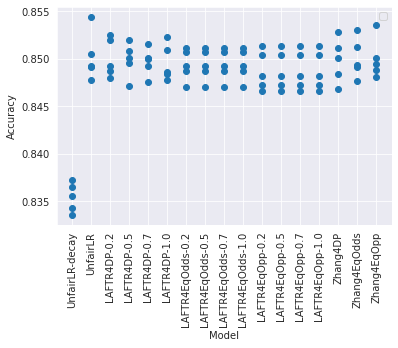

In [51]:
plt.plot()
plt.ylabel('Accuracy')

plt.scatter(model_names, model_accs)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Demographic Disparities

In [52]:
model_dps = unfair['dp'].to_list()+laftr['dp'].to_list()+zhang['dp'].to_list()

No handles with labels found to put in legend.


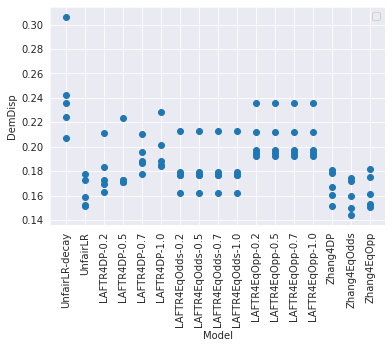

In [53]:
plt.plot()
plt.ylabel('DemDisp')

plt.scatter(model_names, model_dps)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Disparity in Equal Odds

No handles with labels found to put in legend.


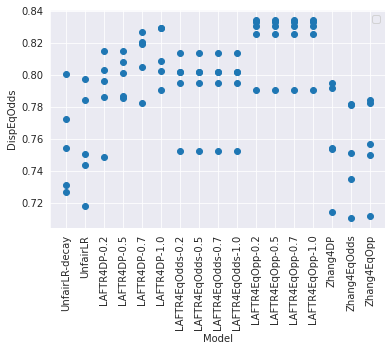

In [54]:
model_deqodds = unfair['deqodds'].to_list()+laftr['deqodds'].to_list()+zhang['deqodds'].to_list()
plt.plot()
plt.ylabel('DispEqOdds')

plt.scatter(model_names, model_deqodds)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Disparity in Equal Opp

No handles with labels found to put in legend.


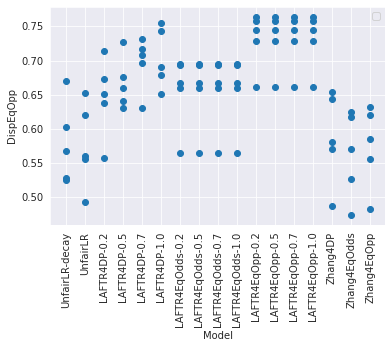

In [55]:
model_deqopps = unfair['deqopp'].to_list()+laftr['deqopp'].to_list()+zhang['deqopp'].to_list()
plt.plot()
plt.ylabel('DispEqOpp')

plt.scatter(model_names, model_deqopps)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Trade-off Acc-DemDisp

No handles with labels found to put in legend.


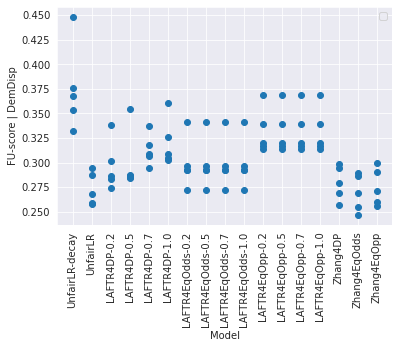

In [56]:
model_trade_dp = unfair['trade_dp'].to_list()+laftr['trade_dp'].to_list()+zhang['trade_dp'].to_list()
plt.plot()
plt.ylabel('FU-score | DemDisp')

plt.scatter(model_names, model_trade_dp)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Trade-off Acc-DispEqOdds

No handles with labels found to put in legend.


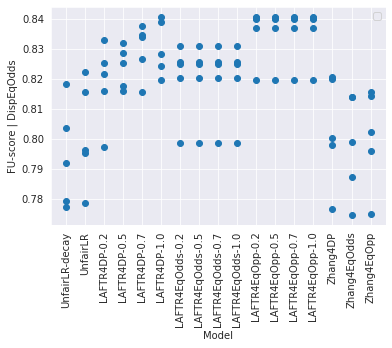

In [57]:
model_trade_deqodds = unfair['trade_deqodds'].to_list()+laftr['trade_deqodds'].to_list()+zhang['trade_deqodds'].to_list()
plt.plot()
plt.ylabel('FU-score | DispEqOdds')

plt.scatter(model_names, model_trade_deqodds)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Trade-off Acc-DispEqOpp

No handles with labels found to put in legend.


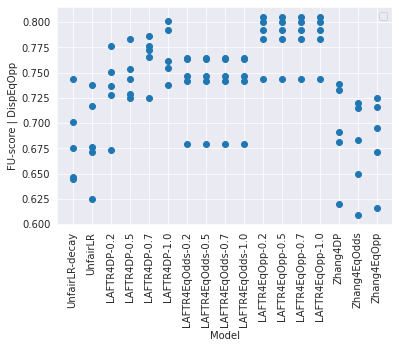

In [58]:
model_trade_deqopp = unfair['trade_deqopp'].to_list()+laftr['trade_deqopp'].to_list()+zhang['trade_deqopp'].to_list()
plt.plot()
plt.ylabel('FU-score | DispEqOpp')

plt.scatter(model_names, model_trade_deqopp)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Acc x DemDisp

In [59]:
'''cmap=sns.light_palette("seagreen")#,as_cmap=True)
cmap'''

'cmap=sns.light_palette("seagreen")#,as_cmap=True)\ncmap'

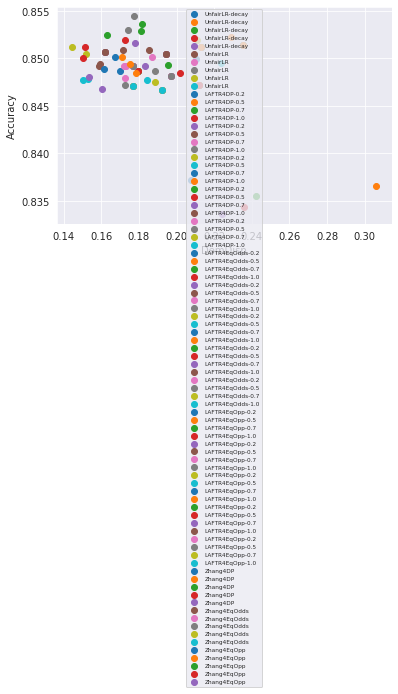

<Figure size 504x504 with 0 Axes>

In [60]:
plt.plot()
#sns.light_palette("seagreen",as_cmap=True)

#fig, ax = plt.scatter(model_dps, model_accs)#, label = "ZHANG DemPar")
'''fig, ax = plt.subplots()
ax.scatter(model_dps, model_accs)'''

plt.xlabel('DemDisp')
plt.ylabel('Accuracy')

for i, model_name in enumerate(model_names):
    plt.scatter(model_dps[i], model_accs[i], label=model_name)#, color=cmap[i])
plt.legend(loc='upper center', fontsize='xx-small')
plt.figure(figsize=(7,7))

plt.show()

## Plotting Acc x DispEqOdds

## Plotting Acc x DispEqOpp

# Pro artigo

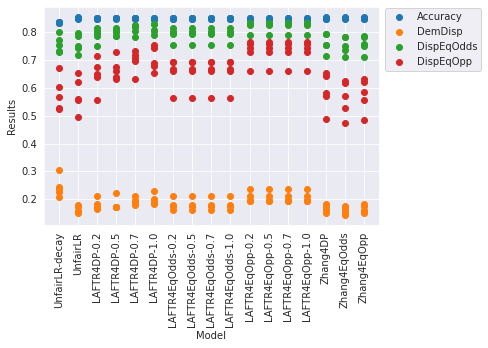

In [61]:

plt.plot()
plt.ylabel('Results')

plt.scatter(model_names, model_accs)
plt.scatter(model_names, model_dps)
plt.scatter(model_names, model_deqodds)
plt.scatter(model_names, model_deqopps)#, label = "ZHANG DemPar")


plt.xlabel('Model')
plt.xticks(rotation=90)
#plt.figure(figsize=(15,12))
#plt.yticks(range(0.755, 0.985))
#plt.yscale('log')
#plt.yticks([0.755, 0.80, 0.805, 0.81, 0.815, 0.82, 0.825, 0.83, 0.835, 0.84, 0.845, 0.85, 0.855, 0.86, 0.865, 0.87, 0.875, 0.88, 0.885, 0.89, 0.895, 0.90, 0.905, 0.91, 0.915, 0.92, 0.925, 0.93, 0.935, 0.94, 0.945, 0.95, 0.955, 0.96, 0.965, 0.97, 0.975,0.98, 0.985])
plt.legend(['Accuracy', 'DemDisp', 'DispEqOdds', 'DispEqOpp'], bbox_to_anchor=(1.32,1.02), loc="upper right")
plt.show()

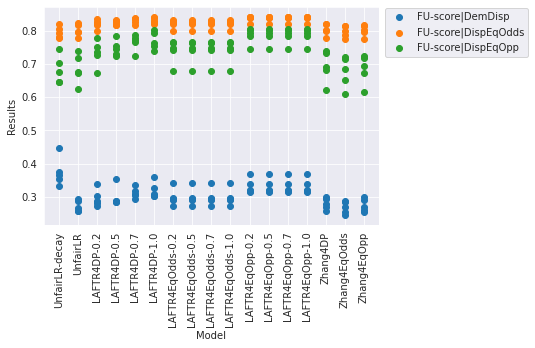

In [62]:

plt.plot()
plt.ylabel('Results')

plt.scatter(model_names, model_trade_dp)
plt.scatter(model_names, model_trade_deqodds)
plt.scatter(model_names, model_trade_deqopp)#, label = "ZHANG DemPar")


plt.xlabel('Model')
plt.xticks(rotation=90)
#plt.figure(figsize=(15,12))
#plt.yticks(range(0.755, 0.985))
#plt.yscale('log')
#plt.yticks([0.755, 0.80, 0.805, 0.81, 0.815, 0.82, 0.825, 0.83, 0.835, 0.84, 0.845, 0.85, 0.855, 0.86, 0.865, 0.87, 0.875, 0.88, 0.885, 0.89, 0.895, 0.90, 0.905, 0.91, 0.915, 0.92, 0.925, 0.93, 0.935, 0.94, 0.945, 0.95, 0.955, 0.96, 0.965, 0.97, 0.975,0.98, 0.985])
plt.legend(['FU-score|DemDisp', 'FU-score|DispEqOdds', 'FU-score|DispEqOpp'], bbox_to_anchor=(1.46,1.02), loc="upper right")
plt.show()